# Learning Objectives

## Specifying Policies

Reinforcement learning is a problem formulation for sequential decision making under uncertainty. Earlier, we learned that the agent's role in this interaction is to choose an action on each time step. The choice of action has an immediate impact on both the immediate reward, and the next state. In the simplest case, a **policy** maps each **state** to a single **action**. This kind of policy is called the *deterministic policy*. We use the Greek letter $\pi$ to denote a policy, and $\pi(s) = a$ represents the action $a$ selected in state $s$ by the policy $\pi$. 

<img src="images/deterministic_policy.svg" width="40%" align="center"/>

In the image above, $\pi$ selects the action $a_1$ in state $s_0$ and action $a_0$ in states $s_1$ and $s_2$. We can also visualize a deterministic policy with a table. 

| STATE | ACTION |
| ----- | ------ |
| $s_0$ | $a_1$  |
| $s_1$ | $a_0$  |
| $s_2$ | $a_0$  |

Each row describes the action chosen by $\pi$ in each state. Notice that the agent can select the same action in multiple states, and some actions might not be selected in any state. Consider the example shown in the image below, where an agent moves towards its house on a grid. The states correspond to the locations on the grid. The actions move the agent up, down, left, and right. The arrows describe one possible policy, which moves the agent towards its house. Each arrow tells the agent which direction to move in each state. 

<img src="images/path_policy.svg" width="30%" align="center"/>

In general, a policy assigns probabilities to each action in each state. We use the notation $\pi(a|s)$ to represent the probability of selecting action $a$ in a state $s$. A stochastic policy is one where multiple actions may be selected with non-zero probability. In the image below, we show the distribution over actions for state $S_0$ according to $\pi$. 

<img src="images/policy_distribution.svg" width="40%" align="center"/>

Remember that $\pi$ specifies a separate distribution over actions for each state. So we have the sum over all action probabilities must be one for each state, and each action probability must be non-negative. 

$$
\sum\limits_{a \in \mathcal{A}(s)} \pi(a|s) = 1 \ \ \ \pi(a|s) \ge 0
$$

Let's look at another state in the image above, $S_1$. $\pi$ in $S_1$ corresponds to a completely different distribution over actions. In the example, the set of available actions is the same in each state, but in general, this set can be different in each state. Most of the time we won't need this extra generality, but it's important nonetheless. 

In the house example below, a stochastic policy might choose up or right with equal probability in the bottom row. Notice the stochastic policy will take the same number of steps to reach the house as the deterministic policy we discussed before. Previously we discussed how a stochastic policy, like $\epsilon$-greedy, can be useful for exploration. The same kind of exploration-exploitation trade-off exists in MDPs. 

<img src="images/stochastic_policy.svg" width="30%" align="center"/>

It's important that policies depend only on the current state, not on other things like time or previous states. The state defines all the information used to select the current action. In this MDP, we can define a policy that chooses to go either left or right with equal probability. We might also want to define a policy that chooses the opposite of what it did last, alternating between left and right actions. However, that would not be a valid policy because this is conditional on the last action. That means the action depends on something other than the state. It is better to think of this as a requirement on the state, not a limitation on the agent. In MDPs, we assume that the state includes all the information required for decision-making. If alternating between left and right would yield a higher return, then the last action should be included in the state. 

## Value Functions

Many problems involve some amount of delayed reward. A store manager could lower their prices and sell off their entire inventory to maximize short term gain. However, they would do better in the long run by maintaining inventory to sell when the demand is high. 

> In reinforcement learning, **reward** captures the notion of short-term gain. The objective however, is to learn a policy that achieves the most reward in the long run. 

Value functions formalize what this means. Roughly speaking, a **state-value function** is the future reward an agent can expect to receive starting from a particular state. More precisely, 

> the **state-value function** is the expected return from a given state. 

The agent's behavior will also determine how much total reward it can expect. A **value function** is defined with respect to a given policy ($v_\pi$), where the subscript $\pi$ indicates the value function is contingent on the agent selecting actions according to $\pi$. Likewise, a subscript $\pi$ on the expectation indicates that the expectation is computed with respect to the policy $\pi$.

$$
v_{\pi}(s) \doteq \mathbb{E}_{\pi} [G_t | S_t = s] \ \ \ \text{where} \ \ \ G_t = \sum\limits_{k=0}^{\infty} \gamma^k R_{t+k+1}
$$

We can also define an **action-value function** that describes what happens when the agent first selects a particular action. More formally, the **action-value** of a state is the expected return if the agent selects action $a$ and then follows policy $\pi$. 

$$
q_{\pi}(s,a) \doteq \mathbb{E}_{\pi} [G_t | S_t = s, A_t = a] \ \ \ \text{where} \ \ \ G_t = \sum\limits_{k=0}^{\infty} \gamma^k R_{t+k+1}
$$

**Value functions** are crucial in reinforcement learning. They allow an agent to query the quality of its current situation instead of waiting to observe the long-term outcome. The benefit is twofold: (i) the return is not immediately available and (ii) the return may be random due to stochasticity in both the policy and environment dynamics. The value function summarizes all the possible futures by averaging over returns. 

<img src="images/value_function.svg" width="50%" align="center"/>

Ultimately, we care most about learning a good policy. **Value function** enables us to judge the quality of different policies. For example, consider an agent playing the game of chess. Chess has an episodic MDP, the state is given by the positions of all the pieces on the board, the actions are the legal moves, and termination occurs when the game ends in either a win, loss, or draw. We could define the reward as `+1` for winning and `0` for all the other moves. This reward does not tell us much about how well the agent is playing during the match. Thus, we have to wait until the end of the game to see any non-zero reward. 

On the other hand, the **value function** tells us much more. The state value is equal to the expected sum of future rewards. Since the only possible non-zero reward is `+1` for winning, the state value is simply the probability of winning if we follow the current policy $\pi$. In this two player game, the opponent's move is part of the state transition. For example, the environ moves both the agents piece, circled in blue, and the opponent's piece, circled in red. This puts the board into a new state, $s'$. Note, the value of state $s'$ is lower than the value of state $s$. This means we are less likely to win the game from this new state assuming we continue following policy $\pi$. An **action-value function** would allow us to assess the probability of winning for each possible move given we follow the policy $\pi$ for the rest of the game. 

<img src="images/chess.svg" width="50%" align="center"/>

In the next example with continuing MDP, the states are defined by the locations on the grid, the actions move the agent up, down, left, or right. The agent cannot move off the grid and bumping generates a reward of `-1`. Most other actions yield no reward. There are two special states however, these special states are labeled $A$ and $B$. Every action in state $A$ yields `+10` reward and `+5` reward in state $B$. Every action in state $A$ and $B$ transitions the agents to states $A'$ and $B'$ respectively. Remember, we must specify the policy before we can figure out what the value function is. Let's look at the uniform random policy. Since this is a continuing task, we specify $\gamma=0.9$. We compute and estimate the value function and show in the image on the right the value of each state. 

<img src="images/continuing_mdp.svg" width="100%" align="center"/>

First, notice the negative values near the bottom in image (a), these values are low because the agent is likely to bump into the wall before reaching the distance states $A$ and $B$. Remember, $A$ and $B$ are both the only sources of positive reward in this MDP. State $A$ has the highest value as seen in image (b), notice that the value is less than $10$ even though every action from state $A$ generates a reward of `+10`. This occurs because every transition from $A$ moves the agent close to the lower wall and near the lower wall, the random policy is likely to bump and get negative reward. On the other hand, the value of state $B$ is slightly greater than five as seen in image (c). The transition from $B$ moves the agent to the middle, where the agent is unlikely to bump and is close to the high-valued states $A$ and $B$. It's really quite amazing how the value function compactly summarizes all these possibilities.

Summarizing, 

> **State-value function** refers to the expected return from a given state under a specific policy.
>
> **Action-value function** refers to the expected return from a given state after selecting a particular action and then following a given policy.

## Rich Sutton and Andy Barto: A brief History of RL

Andrew and I woke Reinforcement Learning up because it would add fallings on collect, and we clarified what it was and how it's different from supervised learning. This is sort of what I was characterizing as the origin story of reinforcement learning. It was an obvious idea, Marvin Minsky knew it in 1960 or '59. It's so obvious that everyone knew it, but then it became overshadowed by supervised learning until, Eric Loft started knocking on people's doors and saying, "Hey, this is something that's been neglected." And as real and as important and tasked us to figure it out. In fact, the very first neural network simulation on a digital computer by farmland Clark in 1954 was a reinforcement learning system. 

I think at the time, search for something that works and then you will remember, combining search and memory is the essence of reinforcing, then strangely had been wrong. Donald Mickey, talked about mentalization which is one, RL is a memorized search. You do some operation, and then you remember the results, and the next time you have to do it. You look it up instead of recomputing, and it saves a lot of time and so on. In a sense, our RL at its root is memorized context-sensitive search. Pople Stone at the end of one of his paper on the 50ths talks about interpolator, like using polynomials instead of Lookup table to look up something with generalization. That's what neural networks do, for example. We didn't invent memorization, but through a new use for it. I don't know if people were doing memorized search the way reinforcement learner's. Here he had this idea of a distributed approach. He also had the idea of what you call a generalized reinforcement, that one of these units could be reinforced by all kinds of signals and not just our binary signal. Without making goal-seeking systems out of ballsy proponents, and without having a generalized reinforcement, would have just have a specialized reward signal. 

> I think that's what reinforcement learning is... It is just focusing on a learning system that actually wants something that does trial and error and remembers it, and has to specialized reward signal.

## Bellman Equation Derivation
In everyday life, we learn a lot without getting explicit, positive, or negative feedback. Imagine for example, you are riding a bike and hit a rock that sends you off balance. Let's say you recover so you don't suffer any injury. You might learn to avoid rocks in the future and perhaps react more quickly if you do hit one. We recognize that the state of losing our balance is bad even without falling and hurting ourselves. In reinforce and learning a similar idea allows us to relate the value of the current state to the value of future states without waiting to observe all the future rewards. We use **Bellman equations** to formalize this connection between the value of a state and its possible successors. 

### Bellman equation for the state-value function

First, let's talk about the Bellman equation for the **state-value function**. The Bellman equation for the state value function defines a relationship between the value of a state and the value of his possible successor states. To derive this relationship from the definitions of the state-value function and return, let's start by recalling that the state-value function is defined as the expected return starting from the state $s$. Recall that the return is defined as the discounted sum of future rewards. 

$$
V_{\pi}(s) \doteq \mathbb{E}_{\pi} [\color{blue}{G_t} | S_t = s] \hspace{100px} \color{blue}{G_t = \sum\limits_{k=0}^{\infty} \gamma^k R_{t+k+1}}
$$

We saw previously that the return at time $t$, can be written recursively as the immediate reward plus the discounted return at time $t+1$. 

$$
V_{\pi}(s) = \mathbb{E}_{\pi} [\color{blue}{R_{t+1} + \gamma G_{t+1}} | S_t = s]
$$

Now, let's expand this expected return. First, we expand the expected return as a sum over possible action choices made by the agent. Second, we expand over possible rewards and next states condition on state $s$ and action $a$. We can break it down in this order because the action choice depends only on the current state, while the next state and reward depend only on the current state and action. The result is a weighted sum of terms consisting of immediate reward plus expected future returns from the next state $s'$. 

$$
V_{\pi}(s) = \color{green}{\sum\limits_a \pi(a|s) \sum\limits_{s'}\sum\limits_{r} p(s',r | s, a)} \left [r + \gamma \color{blue}{\mathbb{E}_{\pi} [G_{t+1} | S_{t+1} = s']}\right ]
$$

All we have done is explicitly write the expectation as it's defined, as a sum of possible outcomes weighted by the probability that they occur. Note that capital $R_{t+1}$ is a random variable, while the little $r$ represents each possible reward outcome. The expected return depends on states and rewards infinitely far into the future. We could recursively expand this equation as many times as we want, but it would only make the expression more complicated.

$$
V_{\pi}(s) = \color{green}{\sum\limits_a \pi(a|s) \sum\limits_{s'}\sum\limits_{r} p(s',r | s, a)} \left [r + \gamma \color{blue}{\sum\limits_{a'} \pi(a'|s') \sum\limits_{s''}\sum\limits_{r'} p(s'',r' | s', a') } \left [r' + \gamma \color{red}{\mathbb{E}_{\pi} [G_{t+2} | S_{t+2} = s'' }\right ] \right ]
$$

Instead, we can notice that this expected return is also the definition of the value function for state $s'$. The only difference is that the time index is $t+1$ instead of $t$. This is not an issue because neither the policy nor $p$ depends on time. Making this replacement, we get the **Bellman equation for the state-value function**. 

$$
V_{\pi}(s) = \color{green}{\sum\limits_a \pi(a|s) \sum\limits_{s'}\sum\limits_{r} p(s',r | s, a)} \left [r + \gamma \color{blue}{V_{\pi(s')}}\right ]
$$

The magic of value functions is that we can use them as a stand-in for the average of an infinite number of possible futures. 

### Bellman equation for the action value function

We can derive a similar equation for the action-value function. Recall the original equation for action-value function.

$$
q_{\pi}(s, a) \doteq \mathbb{E}_{\pi} [G_{t} | S_{t} = s, A_{t} = a]
$$

We create a recursive equation for the value of a state action pair in terms of its possible successors state action pairs. In this case, the equation does not begin with the policy selecting an action. This is because the action is already fixed as part of the state action pair. Instead, we skip directly to the dynamics function $p$ to select the immediate reward and next state $s'$. Again, we have a weighted sum over terms consisting of immediate reward plus expected future return given a specific next state $s'$. 

$$
q_{\pi}(s, a) = \color{green}{\sum\limits_{s}\sum\limits_{r} p(s',r | s, a)} \left [r + \gamma \color{blue}{\mathbb{E}_{\pi} [G_{t+1} | S_{t+1} = s']}\right ]
$$

However, unlike the Bellman equation for the state-value function, we can't stop here. We want to recursive equation for the value of one state action pair in terms of the next state action pair. At the moment, we have the expected return given only the next state. To change this, we can express the expected return from the next state as a sum of the agents possible action choices. In particular, we can change the expectation to be conditioned on both the next state and the next action and then sum over all possible actions. Each term is weighted by the probability under $\pi$ of selecting $a'$ in the state $s'$. 

$$
q_{\pi}(s, a) = \color{green}{\sum\limits_{s}\sum\limits_{r} p(s',r | s, a)} \left [r + \gamma \sum\limits_{a'} \pi(a', s') \color{blue}{\mathbb{E}_{\pi} [G_{t+1} | S_{t+1} = s', A_{t+1} = a']}\right ]
$$

Now, this expected return is the same as the definition of the action-value function for $s'$ and $a'$. Making this replacement, we get the Bellman equation for the action value function. 

$$
q_{\pi}(s, a) = \color{green}{\sum\limits_{s}\sum\limits_{r} p(s',r | s, a)} \left [r + \gamma \sum\limits_{a'} \pi(a', s') \color{blue}{q_{\pi}(s', a')}\right ]
$$

So, we derived the Bellman equations for state and action value functions. These equations provide relationships between the values of a state or state action pair and the possible next states or next state action pairs. The Bellman equations capture an important structure of the reinforcement learning problem.

## Why Bellman Equations?

To illustrate the power of Bellman equations, consider the small example that consists of just four states, labeled A, B, C and D on a grid. The action space consists of moving up, down, left and right. Actions which would move off the gri (as in the last example), instead keep the agent in place. 

<img src="images/grid_world.svg" width="100%" align="center"/>

In this example, the reward is `0` everywhere except for any time the agent lands in state `B`. If the agent lands in state `B`, it gets a reward of `+5`. This includes starting in state `B` and hitting a wall to remain there. Let's consider the uniform random policy, which moves in every direction 25% of the time. The discount factor gamma 0.7.

<img src="images/bellman_example.svg" width="45%" align="center"/>

To define the value of each of these states `A`, `B`, `C` and `D` under this policy, recall that the value function is defined as the expected return under policy $\pi$. This is an average over the return obtained by each sequence of actions an agent could possibly choose, infinitely, many possible features. 

$$
\begin{matrix}
V_{\pi}(A) \doteq \mathbb{E}_{\pi}[G_t|S_t = A] \\
V_{\pi}(B) \doteq \mathbb{E}_{\pi}[G_t|S_t = B]\\
V_{\pi}(C) \doteq \mathbb{E}_{\pi}[G_t|S_t = C]\\
V_{\pi}(D) \doteq \mathbb{E}_{\pi}[G_t|S_t = D]
\end{matrix}
$$

Using the Bellman equation, we can write down an expression for the value of state `A` in terms of the sum of the four possible actions and the resulting possible successor states. 

$$
V_{\pi}(s) = \color{green}{\sum\limits_a \pi(a|s)} \color{red}{\sum\limits_{s'}\sum\limits_{r}} p(s',r | s, a) \left [\color{red}{r + \gamma V_{\pi(s')}}\right ]
$$

We can simplify the expression further in this case, because for each action there's only one possible associated next state and reward. That's the sum over $s'$ and $r$ reduces to a single value. Note that here $s'$ and $r$ do still depend on the selected action, and the current state $s$. However, to keep the notation short, we haven't this explicitly. 

$$
V_{\pi}(A) = \color{green}{\sum\limits_a \pi(a|A)}\color{red}{(r + 0.7V_{\pi}(s'))}
$$

If we go right from state `A`, we land in state `B`, and receive a reward of `+5`. This happens one quarter of the time under the random policy. If we go down, we land in state `C`, and receive no immediate reward. Again, this occurs one-quarter of the time. If you go either up or left, we will land back in state `A` again. Each of the actions, up and left, again, occur one-quarter of the time. Since they both land in state `A` and received no reward, we combine them into a single term with factor of $\frac{1}{2}$. 

$$ V_{\pi}(A) = \color{green}{\frac{1}{4}}\color{red}{5+0.7V_{\pi}(B)} + \color{green}{\frac{1}{4}}\color{red}{0.7V_{\pi}(C)} + \color{green}{\frac{1}{2}}\color{red}{0.7V_{\pi}(A)}
$$

Similar to the equation for `A`, we can write down a similar equation for each of the other states, `B`, `C`, and `D`. Thus, we have a system of for equations for four variables that we can solve by hand, or put it into an automatic equation solver.

$$
\begin{matrix}
V_{\pi}(A) =& \color{green}{\frac{1}{4}}\color{red}{5+0.7V_{\pi}(B)} &+& \color{green}{\frac{1}{4}}\color{red}{0.7V_{\pi}(C)} &+& \color{green}{\frac{1}{2}}\color{red}{0.7V_{\pi}(A)} \\
V_{\pi}(B) =& \color{green}{\frac{1}{2}}\color{red}{5+0.7V_{\pi}(B)} &+& \color{green}{\frac{1}{4}}\color{red}{0.7V_{\pi}(A)} &+& \color{green}{\frac{1}{4}}\color{red}{0.7V_{\pi}(D)} \\
V_{\pi}(C) =& \color{green}{\frac{1}{4}}\color{red}{0.7V_{\pi}(A)}\hspace{7mm} &+& \color{green}{\frac{1}{4}}\color{red}{0.7V_{\pi}(D)} &+& \color{green}{\frac{1}{2}}\color{red}{0.7V_{\pi}(C)} \\
V_{\pi}(D) =& \color{green}{\frac{1}{4}}\color{red}{5+0.7V_{\pi}(B)} &+& \color{green}{\frac{1}{4}}\color{red}{0.7V_{\pi}(C)} &+& \color{green}{\frac{1}{2}}\color{red}{0.7V_{\pi}(D)} \\
\end{matrix}
$$

The unique solution is shown below. 

$$
V_{\pi}(A) = 4.2 \hspace{10mm}V_{\pi}(B) = 6.1 \hspace{10mm}V_{\pi}(C) = 2.2 \hspace{10mm}V_{\pi}(D) = 4.2
$$

The important thing to note is that the Bellman equation reduced an unmanageable infinite sum over possible futures, to a simple linear algebra problem. Perhaps for this small problem, you can come up with other ways to work out the values of each of these states. However the Bellman equation provides a powerful general relationship for MDPs. 

In this case, we used the Bellman equation to directly write down a system of equations for the state values, and then some the system to find the values. This approach may be possible for MDPs of moderate size. 

<img src="images/bellman_four_equations.svg" width="60%" align="center"/>

However, in more complex problems, this won't always be practical. Consider the game of chess for example. We probably won't be able to even list all the possible states, there are around $10^{45}$ of them. Constructing and solving the resulting system of Bellman equations would be a whole other story. Humans can learn to play chess very well. However, this simple game represents a tiny fraction of human experience, and humans can learn to do many things. Our agents should be able to learn many things too. 

<img src="images/chess_complexity.svg" width="60%" align="center"/>

To sum up, without the Bellman equation, we might have to consider an infinite number of possible futures. The Bellman equations exploit the structure of the MDP formulation, to reduce this infinite sum to a system of linear equations. We can then potentially solve the Bellman equation directly to find the state values.

## Optimal Policies

Up to this point, we've generally talked about a policy as something that is given. The policy specifies how an agent behaves. Given this way of behaving, we then aim to find the value function. However, the goal of reinforcement learning is not just to evaluate specific policies. Ultimately, we want to find a policy that obtains as much reward as possible in the long run. 

To define an **optimal policy**, we first have to understand what it means for one policy to be better than another. In the image below, we can see the value of two policies plotted across states (a). Note that we plot it as a continuous line for illustration only. We are still considering discrete states, and the value might not very smoothly across states. This plot illustrates that in some states, $\pi_1$ achieves a higher value, and in other states $\pi_2$ two achieves a higher value. So it does not make much sense to say $\pi_1$ is better than $\pi_2$, or that $\pi_2$ is better than $\pi_1$. We will say policy $\pi_1$ is as good as or better than policy $\pi_2$, if and only if $\pi_1 \ge \pi_2$ for every state as in image (b). In the diagram shown in (b), the line visualizing the value of $\pi_1$ is always above the line for $\pi_2$. Thus, in this case, $\pi_1$ is as good as or better than $\pi_2$. 

<img src="images/pi_states.svg" width="80%" align="center"/>

An **optimal policy** $\pi_*$ as shown in (c), is a policy which is as good as or better than all the other policies. That is, an optimal policy will have the highest possible value in every state. There's always at least one optimal policy, but there may be more than one. It might not be clear why there must exist optimal policies. That is, policies that are at least as good as all other policies and every state.

We can have situations we're doing well in one state requires doing badly and another. Let's say there is such a policy $\pi_1$, which does well in some states while policy $\pi_2$, does well and others, as shown in the image below (d). We could combine these policies into a third policy $\pi_3$, which always chooses actions according to whichever of policy $\pi_1$ and $\pi_2$ has the highest value in the current state. $\pi_3$ will necessarily have a value greater than or equal to both $\pi_1$ and $\pi_2$ in every state, as shown in image (e). So we will never have a situation we're doing well in one state require sacrificing value in another. Because of this, there always exists some policy which is best in every state. This is of course only an informal argument, but there's in fact a rigorous proof showing that there must always exist at least one optimal deterministic policy. Notice, that in some states $\pi_3$ has a strictly greater value than either $\pi_1$ or $\pi_2$.

<img src="images/pi_three.svg" width="60%" align="center"/>

Let's look at a specific example to build some intuition about optimal policies. Consider the two choice MDP shown in the image below. The only decision to be made is in the top state labeled $X$. The agent can take either action $A_1$ or $A_2$. From state $X$, action $A_1$, takes the agent to state $Y$. In state $Y$, only action $A_1$ is available and it takes the agent back to state $X$. On the other hand action $A_2$ and $X$ takes the agent to state $Z$. From state $Z$ action $A_1$ is again the only action available and it takes the agent back to state $X$. The numbers show the rewards the agent receives after each action. 

<img src="images/mdp.svg" width="40%" align="center"/>

Notice that while $A_1$ offers an immediate reward of `+1`, $A_2$ offers a larger reward of `+2` after single-step delay. There are only two deterministic policies in this MDP which are completely defined by the agents choice in state $X$. Take action $A_1$ or take action $A_2$. Let's call these $\pi_1(X) = A_1$ and $\pi_2(X) = A_2$. The optimal policy what will be the one for which the value of $X$ is highest. To get the optimal policy depends on the discount factor $\gamma$. 


Consider $\gamma=0$, thus, the value is defined using only the immediate reward. The value of state $X$ under $\pi_1$ is `+1`, while the value under $\pi_2$ is `0` because the plus to reward occurs after a one-step delay, which does not affect the return when $\gamma$ is set to zero. So in this case, $\pi_1$ is the optimal policy. 

$$
\begin{matrix}
\gamma = 0 & \\
v_{\pi_1}(X) = 1 \\
v_{\pi_2}(X) = 0 
\end{matrix}
$$

Now, using a $\gamma=0.9$, the value of $X$ under each policy is an infinite sum. $\pi_1$ receives an immediate reward of one followed by zero, and then one again, and so on. Each reward and the expression for the value of state $X$ is discounted by some power of $\gamma$.

We can express this compactly as a geometric series. Applying the geometric series formula, we get the value shown here for $\pi_1$ which evaluates to around 5.3. We can write the value under $\pi_2$. Similarly, except we will receive a reward of two on every odd step instead of one on every even step. We can again write this as a geometric series and obtain a closed form solution. In this case, the solution evaluates to around 9.5.

$$
\begin{matrix}
\gamma = 0.9 & \\
v_{\pi_1}(X) = \color{red}{1} + 0.9*\color{red}{0} + (0.9)^2*\color{red}{1} + \ldots = \sum\limits_{k=0}^{\infty} (0.9)^{2k} = \frac{1}{1-0.9^2} \approx 5.3 \\ 
v_{\pi_2}(X) = \color{red}{0} + 0.9*\color{red}{2} + (0.9)^2*\color{red}{0} + \ldots = \sum\limits_{k=0}^{\infty} (0.9)^{2k+1}*\color{red}{2} = \frac{0.9}{1-0.9^2}*2 \approx 9.5 \\ 
\end{matrix}
$$ 

Since 9.5 is higher than 5.3, $\pi_2$ is optimal in this case. In these two choice MDP, finding the optimal policy was relatively straightforward. There were only two deterministic policies, and we simply had to compute the value function for each of them. In general, it will not be so easy. Even if we limit ourselves to deterministic policies, the number of possible policies is equal to the number of possible actions to the power of the number of states. We could use a brute force search where we compute the value function for every policy to find the optimal policy. But it's not hard to see this will become intractable for even moderately large MDPs. 

<img src="images/brute_force_search.svg" width="75%" align="center"/>

Luckily, there's a better way to organize our search of the policy space. The solution will come in the form of yet another set of Bellman equations, called the Bellman's Optimality equations.

## Optimal Value Functions

Recalling that for two policies $\pi_1$ and $\pi_2$, $\pi_1$ is considered as good as or better than $\pi_2$ if and only if the value under $\pi_1$ is greater than or equal to the value under $\pi_2$ for all states. An **optimal policy** is one which as good as or better than every other policy. 

$$
\pi_1 \ge \pi_2 \ \ \ \text{if and only if} \ \ \ v_{\pi_{1}}(s) \ge v_{\pi_{2}}(s) \ \ \ \text{for all} \ \ \ s \in \mathcal{S}
$$

The **value function for the optimal policy** thus has the greatest value possible in every state. We can express this mathematically, by writing that $v_{\pi_{*}}(s)$ is equal to the maximum value over all policies. 

$$
\color{red}{v_{*}} \ \ \ \rightarrow \ \ \ v_{\pi_{*}}(s) \doteq \mathbb{E}_{\pi_{*}}[G_t | S_t = s] = \max\limits_{\pi} v_{\pi}(s) \ \ \ \text{for all} \ \ \ s \in \mathcal{S}
$$

This holds for every state in our state-space. Taking a maximum over policies might not be intuitive. Imagine we were to consider every possible policy and compute each of their values for the state $s$. The value of an optimal policy is defined to be the largest of all the computed values. We could repeat this for every state and the value of an optimal policy would always be the largest. All optimal policies have this same **optimal state-value function**, which we denote by $\color{red}{v_{*}}$. Recall the Bellman equation for the **state-value function**. This equation holds for the value function of any policy including an optimal policy. 

$$
v_{\pi}(s) = \sum\limits_{a} \pi(a|s) \sum\limits_{s'}\sum\limits_{r} p(s', r| s, a)[r + \gamma v_{\pi}(s')]
$$

By substituting the optimal policy $\color{blue}{\pi_{*}}$ into this Bellman equation, we get the Bellman equation for $\color{red}{v_{*}}$. 

$$
\color{red}{v_{*}}(s) = \sum\limits_{a} \color{blue}{\pi_{*}}(a|s) \sum\limits_{s'}\sum\limits_{r} p(s', r| s, a)[r + \gamma \color{red}{v_{*}}(s')]
$$

This is simply the Bellman equation for the specific case of an optimal policy. However, because this is an optimal policy, we can rewrite the equation in a special form, which doesn't reference the policy itself. Remember there always exists an optimal deterministic policy, one that selects an optimal action in every state. Such a deterministic optimal policy will assign Probability `1`, for an action that achieves the highest value and Probability `0`, for all other actions. We can express this another way by replacing the sum over $\color{blue}{\pi_{*}}$ with a $\color{green}{\max\limits_{a}}$. Notice that $\color{blue}{\pi_{*}}$ no longer appears in the equation. 

We have derived a relationship that applies directly to $\color{red}{v_{*}}$ itself. We call this special form, the **Bellman optimality equation for $\color{red}{v_{*}}$**. 

$$
\color{red}{v_{*}}(s) = \color{green}{\max\limits_{a}} \sum\limits_{s'}\sum\limits_{r} p(s', r| s, a)[r + \gamma \color{red}{v_{*}}(s')]
$$

**Optimal policies** also share the same optimal action-value function, which is again the maximum possible for every state action pair. We denote this shared action value function by $\color{red}{q_{*}}$. 

$$
\color{red}{q_{*}} \ \ \ \rightarrow \ \ \ q_{\pi_{*}}(s, a) = \max\limits_{\pi} q_{\pi}(s, a) \ \ \ \text{for all} \ \ \ s \in \mathcal{S} \ \ \ \text{and} \ \ \ a \in \mathcal{A}
$$

We can make the same replacement in the Bellman equation for the action-value function. Recall that:

$$
q_{\pi}(s, a) = \sum\limits_{s'} \sum\limits_{r} p(s', r|s, a) \left [ r + \gamma \sum\limits_{a'} \pi(a'|s') q_{\pi}(s', a') \right ]
$$

Thus, we can generate $\color{red}{q_{*}}(s, a)$ as:

$$
\color{red}{q_{*}}(s, a) = \sum\limits_{s'} \sum\limits_{r} p(s', r|s, a) \left [ r + \gamma \sum\limits_{a'} \color{blue}{\pi_{*}}(a'|s') \color{red}{q_{*}}(s', a') \right ]
$$

Here the optimal policy appears in the inner sum. Once again, we replace the sum over $\color{blue}{\pi_{*}}$ with a $\color{green}{\max\limits_{a}}$. This gives us the **Bellman optimality equation for $\color{red}{q_{*}}$**. 

$$
\color{red}{q_{*}}(s, a) = \sum\limits_{s'} \sum\limits_{r} p(s', r|s, a) \left [ r + \gamma \color{green}{\max\limits_{a'}} \color{red}{q_{*}}(s', a') \right ]
$$

Earlier, we discussed how the Bellman equations form a linear system of equations that can be solved by standard methods. 

$$
v_{\color{blue}{\pi}}(s) = \sum\limits_{a} \color{blue}{\pi}(a|s) \sum\limits_{s'}\sum\limits{r} p(s', r| s, a)[r + \gamma v_{\color{blue}{\pi}}(s')]
$$

<img src="images/linear_solver.svg" width="50%" align="center"/>

$$
\color{red}{v_{*}}(s) = \color{green}{\max\limits_{a}} \sum\limits_{s'}\sum\limits{r} p(s', r| s, a)[r + \gamma \color{red}{v_{*}}(s')]
$$

The Bellman's optimality equation gives us a similar system of equations for the optimal value. However, we cannot solve this system in a similar way to find the optimal state-value function. Taking the maximum over actions is not a linear operation. So standard techniques from linear algebra for solving linear systems won't apply. 

<img src="images/linear_solver.svg" width="50%" align="center"/>

Instead, we use other techniques based on the Bellman equations to compute value functions and policies. You might be wondering why we can't simply use $\color{red}{\pi_{*}}$ in the ordinary Bellman equation to get a system of linear equations for $\color{red}{v_{*}}$. The answer is that we don't know $\color{blue}{\pi_{*}}$. If we did, then we would have already achieved the fundamental goal of reinforcement learning. If we can manage to solve the Bellman optimality equation for $\color{red}{v_{*}}$, we can use the result to obtain $\color{red}{\pi_{*}}$ fairly easily. 

## Using Optimal Value Functions to Get Optimal Policies

To find **optimal value functions**, let's just look at an example where we have already worked out the optimal state value function, $v_{*}$. Specifically, let's take another look at the grid world we introduced earlier in the course. As before, all actions in state $A$ transition to state $A'$ with a reward of `+10`. In state $B$, all actions transition to $B'$ with a reward of `+5`. The reward is zero everywhere else except for `-1`, for bumping into the walls. The discount factor is $\gamma=0.9$. Here are the associated optimal values for each state.

<img src="images/mdp_ab.svg" width="35%" align="center"/>

Notice that unlike before, the values along the bottom are not negative. Unlike the uniform random policy, the optimal policy won't ever choose to bump into the walls. As a consequence, the optimal value of state $A$ is also much higher than the immediate reward of `+10`.

<img src="images/mdp_ab_vstar.svg" width="45%" align="center"/>

In general, having $v_{*}$ makes it relatively easy to work out the optimal policy as long as we also have access to the dynamics function $p$. For any state, we can look at each available action and evaluate the term after `argmax` in the the equation of $\pi_{*}(s)$. There will be some action for which this term obtains a maximum. A deterministic policy which selects this maximizing action for each state will necessarily be optimal, since it obtains the highest possible value. The equation shown below for $\pi_{*}$ is thus almost the same as the Bellman optimality equation for $v_{*}$.

$$
\begin{matrix}
v_{*}(s) &=& \max\limits_{a} \sum\limits_{s'}\sum\limits_{r} p(s', r| s, a)[r + \gamma v_{*}(s')] \\
\pi_{*}(s) &=& \mathop{\mathrm{argmax}}\limits_{a} \sum\limits_{s'}\sum\limits_{r} p(s', r| s, a)[r + \gamma \color{red}{v_{*}}(s')]
\end{matrix}
$$

Here, $v_{*}$ is equal to the maximum of the boxed term over all actions. $\pi_{*}$ is the argmax, which simply means the particular action which achieves this maximum. To evaluate the term after `argmax` for a given action, we need only perform a one step look ahead at the possible next states and rewards that follow.

In order to compute the optimal action, we look at each state and reward which may follow from state s after taking the certain action. Since we have access to $v_{*}$ and $p$, we can then evaluate each term in the sum over $s'$ and $r$. There could be more than one maximizing optimal action if multiple actions are tied. If there are multiple maximizing actions, we could define a stochastic optimal policy that chooses between each of them with some probability.

Let's take a look at how we can find the optimal policy for the grid world example here. We will use the grid on the right ($\pi_{*}$) to fill on the optimal action choice for each state. First, consider the state highlighted in green in the image below. A one step look ahead considers each action and the potential next states and rewards. This is especially simple in this case, because each action leads us deterministically to a specific next state and reward. We can use the blue part of the equation below for each action.

$$
\pi_{*}(s) = \mathop{\mathrm{argmax}}\limits_{a} \sum\limits_{s'}\sum\limits_{r} p(s', r| s, a)[\color{blue}{r + \gamma v_{*}(s')}]
$$

The up action (light green) gives no reward and a next state value of `17.5`. The sum of reward and discounted next state value is `14.0`. 

$$
\color{blue}{r + \gamma v_{*}(s')} = 0 + 0.9 * 17.5 = 14.0
$$

The right action hits the wall, giving `-1` reward and leaving the agent in the same state, which has a value of `16.0`. The sum of reward and discounted next state value is `13.4`. 

$$
\color{blue}{r + \gamma v_{*}(s')} = -1 + 0.9 * 16.0 = 13.4
$$

The down action leads here, giving no reward, but a next state value of `14.4`. After discounting, this gives `13`. 

$$
\color{blue}{r + \gamma v_{*}(s')} = 0 + 0.9 * 14.4 = 13.0
$$


Finally, the left action gives no reward, but a next state value of `17.8`. Discounting by gamma gives us `16`. 

$$
\color{blue}{r + \gamma v_{*}(s')} = 0 + 0.9 * 17.8 = 16.0
$$

Of all these choices, the highest value action is left at `16`. Therefore, left is the optimal action in this state and must be selected by any optimal policy as show in the right grid in the image below.

<img src="images/mpd_ab_action_1.svg" width="70%" align="center"/> 

As an aside, we have also verified that $v_{*}$, a base the Bellman optimality equation in this state. For the maximizing left action, the right side of the equation of value is to `16`, which is indeed equal to $v_{*}$ for the state itself.

Let's look at another part of the grid. In the state highlighted in green in the image below, two different actions, up and left, each give the same optimal value of `0.9` times `19.8`, which equals `17.8`. Thus in this state, there are two different optimal actions and an optimal policy is free to pick either with some probability.

$$
\color{blue}{r + \gamma v_{*}(s')} = 0 + 0.9 * 19.8 = 17.8
$$

<img src="images/mpd_ab_action_2.svg" width="70%" align="center"/>

As a last example, let's look at state $A$ itself. Remember that regardless of the action we pick in state $A$, we transition to $A'$ with a reward of `+10`. This means that in state $A$, every action is optimal since the transitions are equivalent. $v_{*}$ for state $A$ is `10` plus gamma times $v_{*}$ of $A'$, which is indeed the recorded value for $v_{*}$.

$$
\color{blue}{r + \gamma v_{*}(s')} = 10 + 0.9 * 16 = 24.4
$$

<img src="images/mpd_ab_action_3.svg" width="70%" align="center"/>

Hopefully now, it's clear how we can do this for every state to find the optimal policy. To save us some time, let's just fill in the rest.

<img src="images/mpd_ab_full.svg" width="70%" align="center"/>

We see that the optimal policy essentially heads toward state $A$ to obtain `+10` reward as quickly as possible. Working out the optimal policy from $v_{*}$ is especially simple in this grid world. Each action leads us deterministically to a specific next state and reward. So we only have to evaluate one transition per action. Remember that in general, the dynamics function $p$ can be stochastic, so it might not always be so simple. However, as long as we have access to $p$, we can always find the optimal action from $v_{*}$ by computing the right-hand side of the Bellman optimality equation for each action and finding the largest value. 

If instead we have access to $q_{*}$, it's even easier to come up with the optimal policy. In this case, we do not have to do a one step look ahead at all. We only have to select any action $a$, that maximizes $q_{*}(s, a)$. 

$$
\pi_{*}(s) = \mathop{\mathrm{argmax}}\limits_{a} \color{red}{q_{*}}(s,a)
$$

The action-value function caches the results of a one-step look ahead for each action. In this sense, the problem of finding an optimal action-value function corresponds to the goal of finding an optimal policy. 

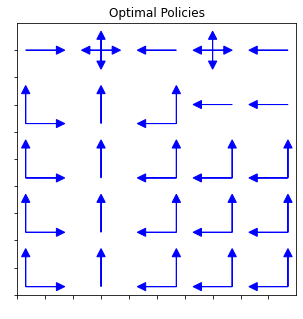

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import utils

class Board(object):
    def __init__(self, values):
        self.values = values
        
    def __iter__(self):
        for i in range(len(self.values)):
            for j in range(len(self.values[i])):
                d = self._v_star(i, j)
                r = self._rewards(i, j)
                yield i, j, self.values[i][j], d, r
                
    def _v_star(self, x, y):
        if x == 0 and (y == 1 or y == 3):
            return [16, 16, 16, 16] # l, u, r, d
        dpos = [float('-inf'), float('-inf'), float('-inf'), float('-inf')]
        if x > 0: dpos[1] = self.values[x-1][y]
        if x < len(self.values)-1: dpos[3] = self.values[x+1][y]
        if y > 0: dpos[0] = self.values[x][y-1]
        if y < len(self.values[x])-1: dpos[2] = self.values[x][y+1]
        return dpos
    
    def _rewards(self, x, y):
        if x == 0 and y == 1:
            return [10, 10, 10, 10]
        elif  x == 0 and y == 3:
            return [5, 5, 5, 5]
        drew = [-1, -1, -1, -1]
        if x > 0: drew[1] = 0
        if x < len(self.values)-1: drew[3] = 0
        if y > 0: drew[0] = 0
        if y < len(self.values[x])-1: drew[2] = 0
        return drew
        
           
class Policy(object):
    def __init__(self, board, gamma):
        self.board = board
        self.gamma = gamma
        self.pi = np.zeros(np.array(self.board.values).shape)
        
    def run(self):
        # r+gamma*v_sprime
        for arr in self.board:
            i, j, local_value, values, rewards = arr
            st_values =  np.array(rewards) + gamma * np.array(values)
            maxargs = np.argwhere(st_values == np.amax(st_values))
            self.pi[i][j] = utils.encode_to_arrow(maxargs.flatten())
        return self.pi            


vstar = [
    [22.0, 24.2, 22.0, 19.4, 17.5],
    [19.8, 22.0, 19.8, 17.8, 16.0],
    [17.8, 19.8, 17.8, 16.0, 14.4],
    [16.0, 17.8, 16.0, 14.4, 13.0],
    [14.4, 16.0, 14.4, 13.0, 11.7]
]

gamma = 0.9
board = Board(vstar)
pi = Policy(board, gamma)
arrows = pi.run()
utils.plot_arrows(arrows)

## Summary

**Policies** tell an agent how to behave. 
- **Deterministic policies** map each state to an action. Each time a state is visited, a deterministic policy selects the associated action $\pi(s)$. 
- **Stochastic policies** map each state to a distribution over all possible actions. Each time state is visited, a stochastic policy randomly draws an action from the associated distribution with probability $\pi(a|s)$. 

A **policy** by definition depends only on the current state. It cannot depend on things like time or previous states. This is best thought of as a restriction on the state, not the agent. The state should provide the agent with all the information it needs to make a good decision. This is an important assumption for many of the techniques in reinforcement learning. 

**Value functions** are like magic. Value functions capture the future total reward under a particular policy. We discussed two kinds of value functions: **state-value functions**, and **action-value functions**. 

- The **state-value function** gives the expected return from the current state under a policy. 
- The **action-value function** gives the expected return from state $s$ if the agent first selects action $a$ and follows $\pi$ after that.

**Value functions** simplify things by aggregating many possible future returns into a single number. 

**Bellman equations** define a relationship between the value of a state or state-action pair and its successor states. The Bellman equation for the state-value function gives the value of the current state as a sum over the values of all the successor states, and immediate rewards. The Bellman equation for the action-value function gives the value of a particular state-action pair as the sum over the values of all possible next state-action pairs and rewards. 

The Bellman equations can be directly solved to find the value function. These Bellman equations help us evaluate policies, but they do not yet achieve our ultimate goal, to find a policy that attains as much reward as possible. To make this goal more precise, we defined **optimal policies**, the **optimal value function**, and the associated **Bellman's optimality equations**. 

- An **optimal policy** is a policy which achieves the highest value possible in every state. There's always at least one optimal policy, but there may be more than one. 
- The **optimal state-value function** is equal to the highest possible value in every state. Every optimal policy shares the same optimal state-value function. 

The same is true for **optimal action-value functions** and **optimal policies**. Like all value functions, the optimal value functions have Bellman equations. These Bellman equations do not reference a specific policy. This amounts to replace in the policy in the Bellman equation with a max over all actions. The optimal policy must always select the best available action. We can extract the optimal policy from the **optimal state-value function**. To do so, we also need the one-step dynamics of the MDP. We can get the optimal policy with much less work if we have the **optimal action-value function**. We simply select the action with the highest value in each state.

In [ ]:
# Centralize images
from IPython.core.display import HTML
def css_styling():
    styles = open("../_styles/custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()